**Question 1**

In [4]:
def reverse_str(word):
    rev=''
    for letter in word[::-1]:
        rev=rev+letter
    return rev

print(reverse_str('hello'))    

olleh


**Question 2**

In [3]:
def bayes(a, b_given_a, b_given_not_a):

    """
    Calculates P(A | B) using bayes theorem.

    Args:
        a: P(A)
        b_given_a: P(B | A)
        b_given_not_a: P(B | ~A)

    Returns:
        P(A | B)
    """

    # YOUR CODE GOES HERE
    """
    a_b=b_a*a/b
    """
    b=b_given_a*a+b_given_not_a*(1-a)
    a_given_b=(b_given_a*a)/b
    return a_given_b


**Question 3**

**a)**

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [30]:
url='https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lahman-teams.csv'
baseball= pd.read_csv(url)
pd.set_option('display.max_columns', 500)

In [81]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          2805 non-null   int64  
 1   lgID            2755 non-null   object 
 2   teamID          2805 non-null   object 
 3   franchID        2805 non-null   object 
 4   divID           1288 non-null   object 
 5   Rank            2805 non-null   int64  
 6   G               2805 non-null   int64  
 7   Ghome           2406 non-null   float64
 8   W               2805 non-null   int64  
 9   L               2805 non-null   int64  
 10  DivWin          1260 non-null   object 
 11  WCWin           624 non-null    object 
 12  LgWin           2777 non-null   object 
 13  WSWin           2448 non-null   object 
 14  R               2805 non-null   int64  
 15  AB              2805 non-null   int64  
 16  H               2805 non-null   int64  
 17  2B              2805 non-null   i

In [13]:
since95= baseball['yearID']>1994
baseball95=baseball.iloc[since95.values]
#baseball95.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 2181 to 2804
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          624 non-null    int64  
 1   lgID            624 non-null    object 
 2   teamID          624 non-null    object 
 3   franchID        624 non-null    object 
 4   divID           624 non-null    object 
 5   Rank            624 non-null    int64  
 6   G               624 non-null    int64  
 7   Ghome           624 non-null    float64
 8   W               624 non-null    int64  
 9   L               624 non-null    int64  
 10  DivWin          624 non-null    object 
 11  WCWin           624 non-null    object 
 12  LgWin           624 non-null    object 
 13  WSWin           624 non-null    object 
 14  R               624 non-null    int64  
 15  AB              624 non-null    int64  
 16  H               624 non-null    int64  
 17  2B              624 non-null   

In [14]:
baseball95=baseball95.assign(SBPG= baseball95.SB/baseball95.G)
baseball95[['yearID','teamID','W', 'SB','SBPG','ERA']].head()

,yearID,teamID,W,SB,SBPG,ERA
2181,1995,ATL,90,73.0,0.506944,3.44
2182,1995,BAL,71,92.0,0.638889,4.31
2183,1995,BOS,86,99.0,0.687500,4.39
2184,1995,CAL,78,58.0,0.400000,4.52
2185,1995,CHA,68,110.0,0.758621,4.85


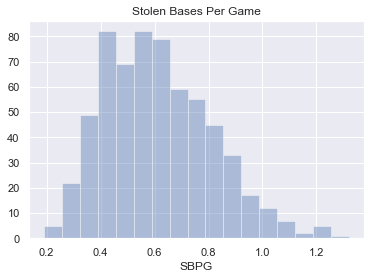

In [96]:
sns.set(color_codes=True)

sns.distplot(baseball95.SBPG, kde=False)
plt.title('Stolen Bases Per Game')
plt.show()

Looks like a binomial distribution, which would make sense because you're repeating the bernoulli trial of attempting to steal a base many times (and just dividing by the total number of games)

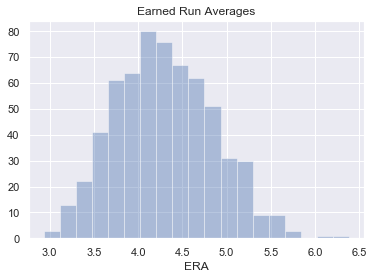

In [34]:
sns.distplot(baseball95.ERA, kde=False)
plt.title('Earned Run Averages')
plt.show()

To me, this looks normal, which would make sense considering it's displaying a distribution of means, which converges on a normal dist as the number of samples become large

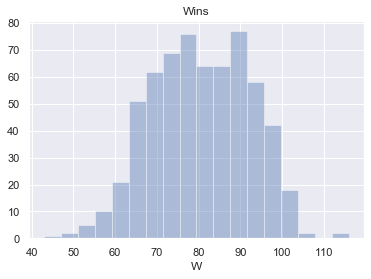

In [35]:
sns.distplot(baseball95.W, kde=False)
plt.title('Wins')
plt.show()

Perhaps binomial, the discrete trial being whether you win the game. The problem is that there are many different Ps

**3. b)**

In [83]:

#highlighting strongest corrs for each column, could apply this as a slice over the whole dataframe? axis=none i think
baseball_corr=baseball.corr()
def highlight_max(s):
    list_s= s.tolist()
    list_s.sort()
    is_max = s == list_s[-2]
    return ['background-color: yellow' if v else '' for v in is_max]
def highlight_min(s):
    list_s= s.tolist()
    list_s.sort()
    is_max = s == list_s[0]
    return ['background-color: red' if v else '' for v in is_max]

highlighted_corr=baseball_corr.style.apply(highlight_max)
highlighted_corr.apply(highlight_min)

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF
yearID,1.000000,-0.293981,0.601304,0.341956,0.418790,0.425112,0.273367,0.605436,0.506059,0.683101,-0.610569,0.837680,0.572747,0.892200,-0.392816,-0.230845,-0.204524,-0.262328,0.275035,0.642611,0.371608,-0.876366,0.095318,0.897888,0.617324,0.507877,0.884038,0.572311,0.879181,-0.833145,0.517770,0.777934,0.810843,0.002673,-0.007313
Rank,-0.293981,1.000000,-0.171295,-0.085398,-0.732510,0.502550,-0.447966,-0.199481,-0.306493,-0.364275,0.065342,-0.358621,-0.283531,-0.225856,-0.044271,0.024827,-0.121507,-0.253320,0.305040,0.100081,0.318717,0.196974,-0.380173,-0.403732,-0.202563,0.046543,-0.173527,0.013765,-0.346624,0.308794,-0.030141,-0.298955,-0.465841,-0.161572,0.117475
G,0.601304,-0.171295,1.000000,0.963764,0.676371,0.661355,0.532620,0.986522,0.867794,0.679297,0.002071,0.522866,0.774200,0.650705,-0.097893,0.172786,-0.020682,0.086856,0.513703,0.703112,0.174785,-0.246025,0.351139,0.525381,0.996585,0.858471,0.549978,0.776006,0.641185,-0.494665,0.612708,0.859709,0.405767,0.040381,-0.005753
Ghome,0.341956,-0.085398,0.963764,1.000000,0.358841,0.295313,0.353552,0.904329,0.547261,0.379173,-0.169251,0.380709,0.381918,0.485755,0.017897,0.040722,-0.009773,0.060635,0.314490,0.374492,0.086441,-0.284432,0.121658,0.408410,0.951415,0.519463,0.408671,0.370675,0.490309,-0.208608,0.406277,0.319166,0.345927,0.002186,-0.009417
W,0.418790,-0.732510,0.676371,0.358841,1.000000,-0.102111,0.677243,0.689233,0.725160,0.586949,0.086865,0.484075,0.655929,0.419930,0.043120,0.078767,0.161396,0.298843,0.006238,0.235721,-0.220270,-0.134360,0.545568,0.505623,0.697276,0.413214,0.320302,0.380921,0.518630,-0.430352,0.302562,0.644387,0.398222,0.158806,-0.098700
L,0.425112,0.502550,0.661355,0.295313,-0.102111,1.000000,0.028576,0.632149,0.436382,0.339586,-0.122844,0.248887,0.385736,0.495577,-0.186490,0.092447,-0.163465,-0.297095,0.686534,0.726280,0.480528,-0.243658,-0.090116,0.232377,0.637079,0.741285,0.453769,0.667285,0.364530,-0.267573,0.354396,0.521540,-0.069461,-0.108156,0.092108
R,0.273367,-0.447966,0.532620,0.353552,0.677243,0.028576,1.000000,0.618912,0.801701,0.692903,0.252232,0.500400,0.647082,0.250706,0.180675,-0.025908,0.231644,0.509470,0.548338,0.554383,0.317673,-0.054133,-0.005953,0.301986,0.519478,0.594606,0.387560,0.468324,0.307831,-0.131307,0.474370,0.411579,0.298650,0.233560,0.049879
AB,0.605436,-0.199481,0.986522,0.904329,0.689233,0.632149,0.618912,1.000000,0.919542,0.736695,0.015327,0.558739,0.774027,0.630770,-0.120572,0.121801,0.039595,0.296599,0.565210,0.742577,0.227261,-0.258133,0.295969,0.531993,0.984474,0.884420,0.578579,0.777466,0.633544,-0.480204,0.667970,0.845304,0.435161,0.065986,0.005549
H,0.506059,-0.306493,0.867794,0.547261,0.725160,0.436382,0.801701,0.919542,1.000000,0.817653,0.152675,0.532589,0.738454,0.448089,-0.081719,0.136994,0.081104,0.495694,0.592145,0.737566,0.308812,-0.202035,0.188116,0.454741,0.862981,0.867496,0.515793,0.698237,0.489808,-0.433909,0.611877,0.759347,0.313194,0.145735,0.036564
2B,0.683101,-0.364275,0.679297,0.379173,0.586949,0.339586,0.692903,0.736695,0.817653,1.000000,-0.134633,0.666301,0.646537,0.590646,-0.239242,-0.068306,0.140882,0.362087,0.519993,0.735155,0.433879,-0.497952,0.051027,0.609095,0.680553,0.722018,0.662841,0.595325,0.615098,-0.569944,0.512153,0.711360,0.540446,0.148488,0.067810


Yellow has the highest correlation in each column (excluding itself), and red the lowest

I'd imagine that by far the most confounding variable here is the number games played, so it would be more interesting to see these statistics on a per game basis. Let's see how the games played changed with time:

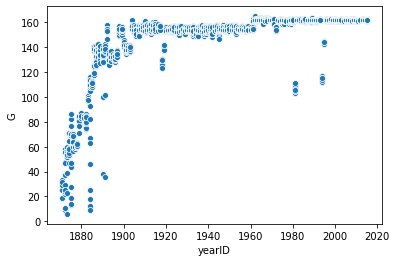

In [84]:
sns.scatterplot(x='yearID', y='G', data=baseball)

Seems like games played started to stabilize after 1915 or so, and remained constant after 1965 or abouts. So we could look at it in terms of games played, and maybe only the modern era as well. 

In [100]:
baseball_pergame= baseball.select_dtypes(exclude=['object']).iloc[:,1:].div(baseball.G, axis=0)

#ERA was already an average, so we'll delete that and add it again
#baseball_pergame=baseball_pergame.drop(columns=['ERA'])
baseball_pergame=baseball_pergame.assign(ERA=baseball.ERA)
baseball_pergame=baseball_pergame.assign(yearID=baseball.yearID)


baseball_pergame=baseball_pergame.drop(['G'], axis=1)

baseball_pergame_corr= baseball_pergame.corr()
highlighted_pergame_corr=baseball_pergame_corr.style.apply(highlight_max)
highlighted_pergame_corr.apply(highlight_min)

,Rank,Ghome,W,L,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF,yearID
Rank,1.000000,-0.086106,-0.475287,0.461000,0.007752,0.185763,-0.110204,-0.225457,0.060440,-0.254146,-0.373306,-0.240990,-0.015311,-0.058143,-0.120453,-0.252902,0.631575,0.148570,0.159448,0.249650,-0.204330,-0.256854,-0.213110,0.491278,-0.179064,-0.250241,-0.286431,0.522652,-0.105219,0.897706,-0.492012,0.899202,0.914157,-0.268255
Ghome,-0.086106,1.000000,0.085352,-0.088059,0.032236,-0.014600,0.007535,0.012379,0.036618,-0.010106,0.015886,-0.009865,0.025276,-0.001785,-0.004757,0.037089,-0.057504,-0.043854,-0.047410,0.015079,0.057880,-0.004786,0.077428,-0.032246,0.001081,-0.030513,0.009291,-0.026225,0.046508,-0.012360,0.030451,0.001419,-0.012767,-0.002442
W,-0.475287,0.085352,1.000000,-0.993873,0.414554,0.109795,0.381487,0.294645,0.110352,0.214242,0.276023,0.000178,0.116148,0.015101,0.160960,0.297411,-0.526345,-0.448368,-0.465085,-0.019523,0.461527,0.230062,0.351587,-0.478246,-0.032490,-0.138606,0.178975,-0.218458,-0.018740,-0.206980,0.277249,-0.210449,-0.235584,0.067995
L,0.461000,-0.088059,-0.993873,1.000000,-0.429846,-0.116824,-0.381329,-0.258655,-0.161284,-0.155171,-0.246886,0.048410,-0.167098,-0.031445,-0.162086,-0.297396,0.515170,0.482844,0.496264,-0.047641,-0.467945,-0.168105,-0.317717,0.479219,0.094879,0.165140,-0.129937,0.171728,0.054602,0.192634,-0.227177,0.197286,0.223828,-0.000621
R,0.007752,0.032236,0.414554,-0.429846,1.000000,0.786370,0.835481,0.402654,0.443137,0.028516,-0.002797,-0.364316,0.318215,-0.093854,0.231457,0.508282,0.438408,0.121796,0.130074,0.308713,-0.240077,-0.173589,-0.145966,0.368224,-0.109517,-0.204639,-0.275384,0.446865,0.159933,0.211129,0.131996,0.267295,0.232472,-0.293911
AB,0.185763,-0.014600,0.109795,-0.116824,0.786370,1.000000,0.760735,0.291508,0.303489,-0.090632,-0.374761,-0.414231,0.040026,-0.156789,0.042744,0.288875,0.544908,0.104849,0.099521,0.293293,-0.278719,-0.210013,0.063861,0.505712,-0.135114,-0.378340,-0.344300,0.597056,0.166476,0.348720,0.103935,0.419689,0.385551,-0.292206
H,-0.110204,0.007535,0.381487,-0.381329,0.835481,0.760735,1.000000,0.550803,0.381432,0.042763,-0.014347,-0.412840,0.079528,0.021126,0.081445,0.493734,0.306704,0.210467,0.207597,0.150146,-0.229842,-0.104158,-0.003573,0.415086,-0.047134,-0.113603,-0.287465,0.209562,0.203979,0.053087,0.039408,0.104416,0.074068,-0.171018
2B,-0.225457,0.012379,0.294645,-0.258655,0.402654,0.291508,0.550803,1.000000,-0.176079,0.492986,0.284656,0.268139,-0.226418,-0.157418,0.141092,0.360692,0.047760,0.431098,0.414115,-0.444377,-0.204680,0.412556,0.093838,0.183087,0.460339,0.194964,0.326760,-0.297062,0.302740,-0.100646,0.453753,-0.115380,-0.123609,0.447429
3B,0.060440,0.036618,0.110352,-0.161284,0.443137,0.303489,0.381432,-0.176079,1.000000,-0.644451,-0.265778,-0.681612,0.522251,0.369892,-0.103278,0.170441,0.222530,-0.259485,-0.231834,0.741824,-0.019342,-0.683592,-0.282132,0.172129,-0.690610,-0.285192,-0.654507,0.514345,-0.301892,0.088682,-0.591397,0.125561,0.104720,-0.770167
HR,-0.254146,-0.010106,0.214242,-0.155171,0.028516,-0.090632,0.042763,0.492986,-0.644451,1.000000,0.504275,0.734134,-0.447062,-0.439218,0.240169,0.132432,-0.154319,0.459757,0.431980,-0.794631,-0.135857,0.783085,0.222444,-0.096507,0.878669,0.422228,0.716713,-0.597537,0.433001,-0.222242,0.713199,-0.238919,-0.229297,0.823440


A few quick observations: Proportion of games at home is most highly correlated with number of wins, which is satisfying.
    You might expect it to influence things like number of stolen bases, but it's hard to learn these things on a season long scale
    Homers, ERA, and especially shutouts are also closely correlated with wins. 
Year seems closely associated with "complete games" per game and negatively with saves. Perhaps teams finished more games (per total games) as time went on.

In [57]:
#Most interesting to me is year, so let's see what changed the most closely with time
baseball.corrwith(baseball['yearID']).sort_values()

CG           -0.876366
E            -0.833145
3B           -0.610569
SB           -0.392816
Rank         -0.293981
SF           -0.262328
CS           -0.230845
HBP          -0.204524
PPF          -0.007313
BPF           0.002673
SHO           0.095318
R             0.273367
RA            0.275035
Ghome         0.341956
ERA           0.371608
W             0.418790
L             0.425112
H             0.506059
HA            0.507877
DP            0.517770
BBA           0.572311
BB            0.572747
G             0.601304
AB            0.605436
IPouts        0.617324
ER            0.642611
2B            0.683101
FP            0.777934
attendance    0.810843
HR            0.837680
SOA           0.879181
HRA           0.884038
SO            0.892200
SV            0.897888
yearID        1.000000
dtype: float64

**Question 4**

In [92]:
def trial_means(statistic):
    means=[]
    for trial in range(1000):
        sample_mean=statistic.sample(n=100).mean()
        means=means+[sample_mean]
    return means

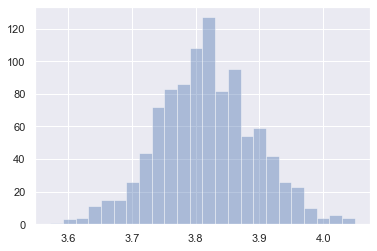

In [97]:
ERA_means=trial_means(baseball['ERA'])
sns.distplot(ERA_means, kde=False)

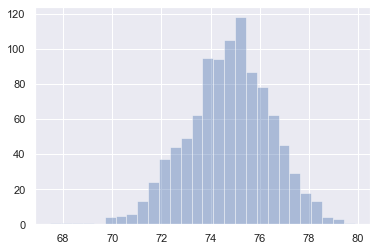

In [98]:
Win_means=trial_means(baseball['W'])
sns.distplot(Win_means, kde=False)

The graphs above look normal, which they should since they're distributions of 1000 means.